**Implementation of Adam optimizer from scratch**

In [ ]:
import numpy as np

In [ ]:
# Define Class Adam Optimizer
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## define momentum gradient equation using beta1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## define rmsprop gradient using beta2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [ ]:
def loss_function(m):
    return m**2-2*m+1

## take derivative
def grad_function(m):
    return 2*m-2

def check_convergence(w0, w1):
    return (w0 == w1)

In [ ]:
# Initialize w_0 and b_0 with random values using function
import random
w_0 = random.random()
b_0 = random.random()
adam = AdamOptim()
# Initialize iteration with 1
t = 1
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1


iteration 1: weight=0.015104835208899842
iteration 2: weight=0.025102074447928162
iteration 3: weight=0.03509468118910826
iteration 4: weight=0.04508076540701274
iteration 5: weight=0.05505842311483637
iteration 6: weight=0.06502574066869864
iteration 7: weight=0.07498079906614061
iteration 8: weight=0.08492167820626587
iteration 9: weight=0.09484646108009658
iteration 10: weight=0.1047532378612828
iteration 11: weight=0.1146401098692683
iteration 12: weight=0.12450519337933096
iteration 13: weight=0.13434662325652189
iteration 14: weight=0.14416255639335906
iteration 15: weight=0.15395117493412785
iteration 16: weight=0.1637106892717357
iteration 17: weight=0.1734393408061982
iteration 18: weight=0.18313540445693954
iteration 19: weight=0.19279719092411693
iteration 20: weight=0.20242304869707686
iteration 21: weight=0.21201136581077862
iteration 22: weight=0.22156057135354149
iteration 23: weight=0.23106913673176094
iteration 24: weight=0.24053557669927406
iteration 25: weight=0.2499

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


**Also implement momentum and RMSProp gradient descent and see the convergence rate (in terms of number of iterations)**

In [ ]:
# Initialize w_0 and b_0 with random values using function
import random
w_0 = random. randint(0, 10)
b_0 = random.uniform(0.001,0.01)
adam = AdamOptim()
# Initialize iteration with 1
t = 1
converged = False
itr = []
loss = []
print(f"Value for w_0 is {w_0}\n")
print(f"Value for b_0 is {b_0}\n")
print()
while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0)+ ' loss= '+str(loss_function(dw)))
        itr.append(t)
        loss.append(loss_function(dw))
        t+=1
    # print(loss_function(dw))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Value for w_0 is 6

Value for b_0 is 0.003339432870367982


iteration 1: weight=5.99000000001 loss= 81
iteration 2: weight=5.9800005268651475 loss= 80.64040000035921
iteration 3: weight=5.970001931881262 loss= 80.281618882848
iteration 4: weight=5.9600045654461535 loss= 79.92366908408886
iteration 5: weight=5.950008776237629 loss= 79.56656289520214
iteration 6: weight=5.940014910458446 loss= 79.2103124343677
iteration 7: weight=5.9300233110939615 loss= 78.8549296203733
iteration 8: weight=5.920034317197878 loss= 78.50042614734363
iteration 9: weight=5.910048263211059 loss= 78.14681346082764
iteration 10: weight=5.900065478317872 loss= 77.7941027354035
iteration 11: weight=5.890086285843992 loss= 77.44230485393874
iteration 12: weight=5.880111002698997 loss= 77.09143038862199
iteration 13: weight=5.87013993886648 loss= 76.74148958385925
iteration 14: weight=5.860173396943767 loss= 76.39249234110368
iteration 15: weight=5.850211671732721 loss= 76.0444482056646
iteration 16: weight=5.8402

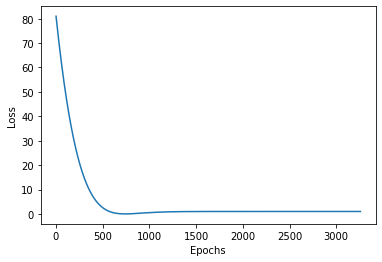

In [ ]:
# Plot the curve for cost vs epoch

from matplotlib import pyplot as plt
plt.plot(itr, loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
class MyMomentumOptimizer ():
  def __init__ (self, learning_rate, momentum = 0.9 ):
    self.learning_rate = learning_rate
    self.momentum = momentum 
    self.w = 0
    self.b = 0
    self.momentum_vector_w = 0
    self.momentum_vector_b = 0
  def _get_batch (self, X, y, batch_size):
    indexes = np.random.randint(len(X), size=batch_size)
    return X[indexes,:], y[indexes,:]
  def _get_momentum_vector (self, X_batch, y_batch):
    f = y_batch - (self.w * X_batch + self.b)
    self.momentum_vector_w = self.momentum * self.momentum_vector_w + \
    self.learning_rate * ( -2 * X_batch.dot(f.T).sum() / len(X_batch))
    self.momentum_vector_b = self.momentum * self.momentum_vector_b + \
    self.learning_rate * ( -2 * f.sum() / len(X_batch))
  def fit (self, X, y, batch_size = 32 , epochs = 100 ):
    history = []
    for e in range(epochs):
      indexes = np.random.randint(len(X), size=batch_size)
      X_batch, y_batch = self._get_batch(X, y, batch_size)
      self._get_momentum_vector(X_batch, y_batch)
      self.w -= self.momentum_vector_w
      self.b -= self.momentum_vector_b
      loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
      if e % 100 == 0 :
        print( f"Epoch: {e} , Loss: {loss} )" )
      history.append(loss)
    return history
  def predict (self, X):
    return self.w * X + self.b 